<a href="https://colab.research.google.com/github/sokrypton/ws2023/blob/main/Day1_phylogeny.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Download example dataset we'll be using this week!

In [ ]:
%%bash
wget -qnc https://raw.githubusercontent.com/sokrypton/ws2023/main/day1/phy_msa.fasta
wget -qnc https://raw.githubusercontent.com/sokrypton/ws2023/main/day1/phy_msa_ext.fasta
wget -qnc https://raw.githubusercontent.com/sokrypton/ws2023/main/day1/phy_primates.fasta

##BioPython Phylogeny
https://biopython.org/wiki/Phylo

In [ ]:
# install biopython
!pip -q install biopython

     |████████████████████████████████| 2.2MB 2.7MB/s 


In [ ]:
##########################################################
# RUN THIS CELL!
##########################################################
import numpy as np
import matplotlib.pylab as plt
from Bio import Phylo

##########################################################
# functions we'll use later:
##########################################################

# Jukes-Cantor model
def jc(p):
  return (-3/4) * np.log(1-(4*p/3))

def jc_correction(mtx):
  '''takes distance matrix and applies Jukes-Cantor correction'''
  new_mtx = []
  for x in mtx:
    new_mtx.append([])
    for p in x:
      new_mtx[-1].append(jc(p))
  return new_mtx

# function that removes labels from inner nodes
def rm_inner(tree):
  for node in tree.get_nonterminals():
    node.name = None

# Parsimony method!

In [ ]:
# library for loading alignments
from Bio import AlignIO

# lets try the alignment we walked through in class!
simple_aln = AlignIO.read('msa.fasta', 'fasta')
print(simple_aln)

SingleLetterAlphabet() alignment with 5 rows and 6 columns
ATTAAT Alpha
TTATTT Beta
AATTTT Gamma
AATAAA Delta
TTAAAT Epsilon


In [ ]:
simple_aln[2].seq

Seq('AATTTT', SingleLetterAlphabet())

steps 8


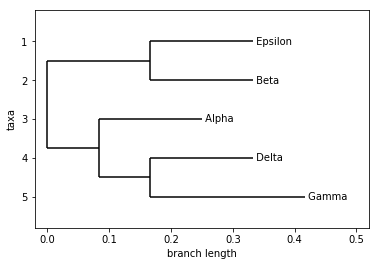

In [ ]:
# libraries for Parsimony Method
from Bio.Phylo.TreeConstruction import ParsimonyTreeConstructor
from Bio.Phylo.TreeConstruction import ParsimonyScorer
from Bio.Phylo.TreeConstruction import NNITreeSearcher

# Fitch algorithm for tracing characters and counting number of steps
scorer = ParsimonyScorer()

# Nearest Neighbor Interchanges (NNI) algorithm
searcher = NNITreeSearcher(scorer) 

# get parsimony tree!
pars_tree = ParsimonyTreeConstructor(searcher, starting_tree=None).build_tree(simple_aln)

# print parsimony score
print("steps",scorer.get_score(pars_tree,simple_aln))

# remove inner labels (opinional)
rm_inner(pars_tree)

# draw the tree!
Phylo.draw(pars_tree)

#Distance Method!

In [ ]:
# libraries for Distance Method
from Bio.Phylo.TreeConstruction import DistanceTreeConstructor
from Bio.Phylo.TreeConstruction import DistanceCalculator
from Bio.Phylo.TreeConstruction import DistanceMatrix

UPGMA tree


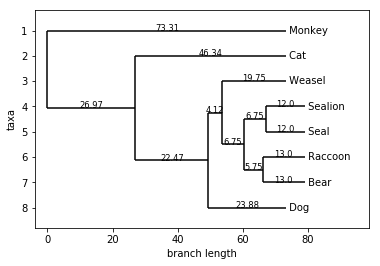

NJ tree


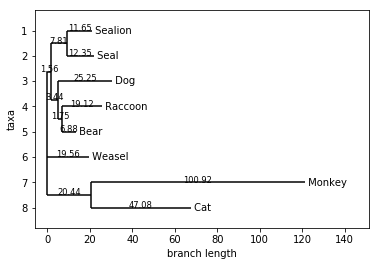

In [ ]:
sarich_names = ["Dog","Bear","Raccoon","Weasel","Seal","Sealion","Cat","Monkey"]
sarich_dist = [
    [0],
    [32, 0],
    [48, 26, 0],
    [51, 34, 42, 0],
    [50, 29, 44, 44, 0],
    [48, 33, 44, 38, 24, 0],
    [98, 84, 92, 86, 89, 90, 0],
    [148,136,152,142,142,142,148,0]]

sarich_dist_mtx = DistanceMatrix(sarich_names,sarich_dist)

print("UPGMA tree")
sarich_upgma_tree = DistanceTreeConstructor().upgma(sarich_dist_mtx)
rm_inner(sarich_upgma_tree)
Phylo.draw(sarich_upgma_tree,branch_labels=lambda x: round(x.branch_length,2))

print("NJ tree")
sarich_nj_tree = DistanceTreeConstructor().nj(sarich_dist_mtx)
rm_inner(sarich_nj_tree)
Phylo.draw(sarich_nj_tree,branch_labels=lambda x: round(x.branch_length,2))

Starting from an alignment

In [ ]:
# load alignment
# this time, lets use an alignment with a bit more characters!

aln = AlignIO.read('msa_ext.fasta', 'fasta')
print(aln)
print("=================")
print(aln[0].id)
print(aln[0].seq)

SingleLetterAlphabet() alignment with 5 rows and 13 columns
AACGTGGCCACAT Alpha
AAGGTCGCCACAC Beta
CAGTTCGCCACAA Gamma
GAGATTTCCGCCT Delta
GAGATCTCCGCCC Epsilon
Alpha
AACGTGGCCACAT


In [ ]:
# compute distance matrix
dist_mtx = DistanceCalculator('identity').get_distance(aln)
print(dist_mtx)
# dist_mtx.names # names of elements, used for indexing
# dist_mtx.matrix # nested list of numerical lists in lower triangular format

Alpha	0
Beta	0.23076923076923073	0
Gamma	0.3846153846153846	0.23076923076923073	0
Delta	0.5384615384615384	0.5384615384615384	0.5384615384615384	0
Epsilon	0.6153846153846154	0.3846153846153846	0.46153846153846156	0.15384615384615385	0
	Alpha	Beta	Gamma	Delta	Epsilon


(Alpha:0.18269,Beta:0.04808,((Epsilon:0.05128,Delta:0.10256):0.27885,Gamma:0.14423):0.04808):0.00000;



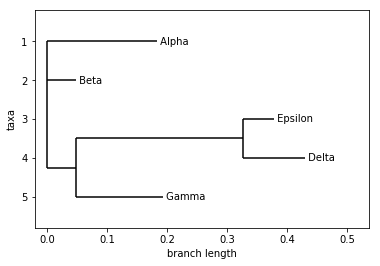

  ____________________________ Alpha
 |
 |______ Beta
_|
 |                                                    _______ Epsilon
 |       ____________________________________________|
 |______|                                            |________________ Delta
        |
        |______________________ Gamma



In [ ]:
# Construct the phylogenetic tree using Neighbor Joining algorithm
nj_tree = DistanceTreeConstructor().nj(dist_mtx)

# remove inner labels (opinional)
rm_inner(nj_tree)

# print the tree in newick format
print(nj_tree.format("newick"))

# draw the tree two different ways (image or as text)
Phylo.draw(nj_tree)
Phylo.draw_ascii(nj_tree)

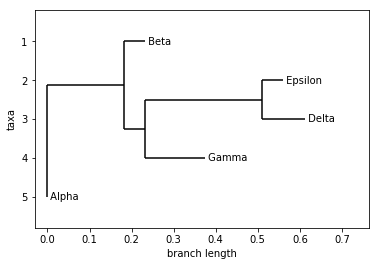

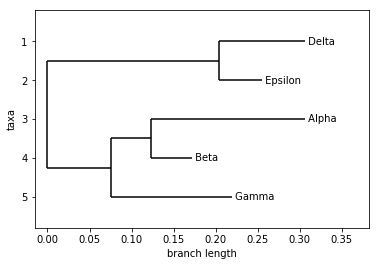

In [ ]:
# reroot the tree using "Alpha"
nj_tree.root_with_outgroup("Alpha")
Phylo.draw(nj_tree)

nj_tree.root_at_midpoint()
Phylo.draw(nj_tree)

# Exercise 1:
1. Repeat with 'upgma' instead of 'nj'? Do the results change?
```Python
upgma_tree = DistanceTreeConstructor().upgma(dist_mtx)
```
2. What is the difference?

## BOOTSTRAP!

Bootstrap replicate: 1
SingleLetterAlphabet() alignment with 5 rows and 13 columns
ATGCACTTATAAA Alpha
ACCCACCCATAAA Beta
AACCCCAAATACA Gamma
GTTCGCTTCTGGG Delta
GCCCGCCCCTGGG Epsilon
Alpha	0
Beta	0.3076923076923077	0
Gamma	0.46153846153846156	0.3846153846153846	0
Delta	0.5384615384615384	0.7692307692307692	0.7692307692307692	0
Epsilon	0.7692307692307692	0.46153846153846156	0.6923076923076923	0.3076923076923077	0
	Alpha	Beta	Gamma	Delta	Epsilon


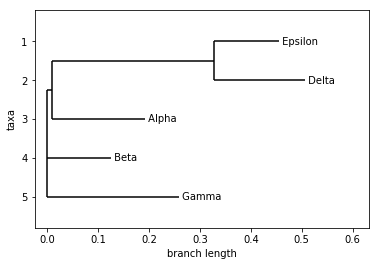

Bootstrap replicate: 2
SingleLetterAlphabet() alignment with 5 rows and 13 columns
CTCGACTACCCGA Alpha
CCCGACCACCCGA Beta
CACGCCAACCCGC Gamma
CTCTGCTACCCTG Delta
CCCTGCCACCCTG Epsilon
Alpha	0
Beta	0.15384615384615385	0
Gamma	0.3076923076923077	0.3076923076923077	0
Delta	0.3076923076923077	0.46153846153846156	0.46153846153846156	0
Epsilon	0.46153846153846156	0.3076923076923077	0.46153846153846156	0.15384615384615385	0
	Alpha	Beta	Gamma	Delta	Epsilon


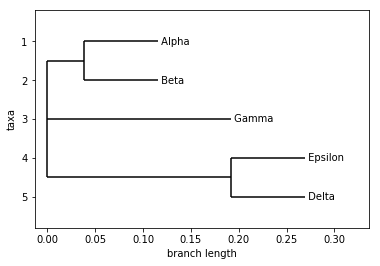

Bootstrap replicate: 3
SingleLetterAlphabet() alignment with 5 rows and 13 columns
ACTACGGAAAGAC Alpha
ACCACGGAAAGAG Beta
ACAACTGAAAGAG Gamma
GCTACATGCCTGG Delta
GCCACATGCCTGG Epsilon
Alpha	0
Beta	0.15384615384615385	0
Gamma	0.23076923076923073	0.15384615384615385	0
Delta	0.6923076923076923	0.6923076923076923	0.6923076923076923	0
Epsilon	0.7692307692307692	0.6153846153846154	0.6923076923076923	0.07692307692307687	0
	Alpha	Beta	Gamma	Delta	Epsilon


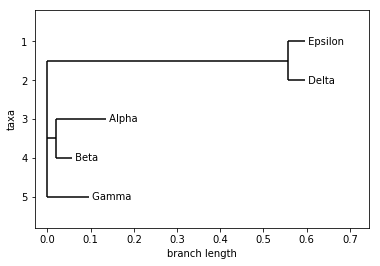

In [ ]:
# libraries for bootstrap support
from Bio.Phylo.Consensus import bootstrap, bootstrap_trees, get_support

# function to randomly generate 100 alignments (sampled with replacement
# from our original alignment)
bootstrap_aln = bootstrap(aln, 100)
list_bootstrap_aln = list(bootstrap_aln)

# lets go through the first 3!
for n in range(3):
  b_aln = list_bootstrap_aln[n]
  b_dist_mtx = DistanceCalculator('identity').get_distance(b_aln)
  b_nj_tree = DistanceTreeConstructor().nj(b_dist_mtx)
  rm_inner(b_nj_tree)
  
  print("=================================")
  print("Bootstrap replicate:",n+1)
  print("=================================")
  print(b_aln)
  print(b_dist_mtx)
  Phylo.draw(b_nj_tree)

Bootstrap replicate: 1


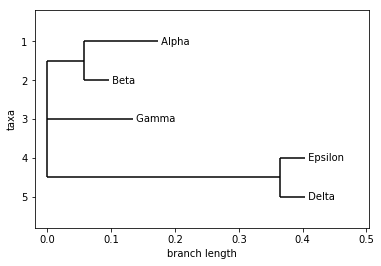

Bootstrap replicate: 2


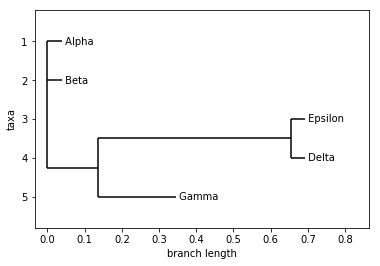

Bootstrap replicate: 3


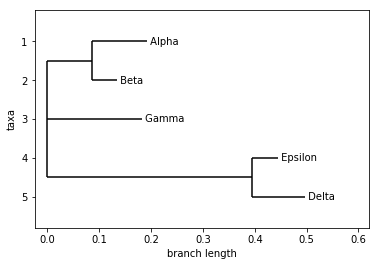

In [ ]:
# luckily BioPython provides a "wrapper" function "bootstrap_trees()" that will do
# all the steps in the previous cell for us!
nj_trees = bootstrap_trees(aln, 100, DistanceTreeConstructor(DistanceCalculator('identity'),'nj'))
list_nj_trees = list(nj_trees)

# lets look at the first 3 trees
for n in range(3):
  print("=================================")
  print("Bootstrap replicate:",n+1)
  print("=================================")
  rm_inner(list_nj_trees[n])
  Phylo.draw(list_nj_trees[n])


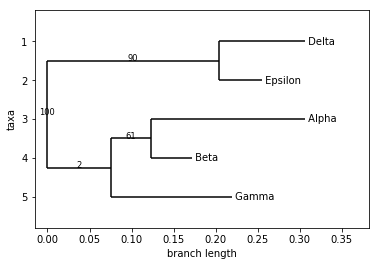

In [ ]:
# now that we have our 100 bootstrap trees we can use the
# "get_support()" function to add support values to nj_tree!
nj_tree = get_support(nj_tree, list_nj_trees)
Phylo.draw(nj_tree)

# Exercise 2:
1. repeat with primates.fasta dataset
2. reroot using Mouse/Bovine
```Python
tree.root_with_outgroup("Mouse","Bovine")
```
3. Who does Human share the closest ancestor to?
4. Create a new distance matrix, but this time apply the Juke_Cantor correction. and repeat steps 1-2. Does anything change?
```Python
jc_dist_mtx = DistanceMatrix(dist_mtx.names,jc_correction(dist_mtx.matrix))
```

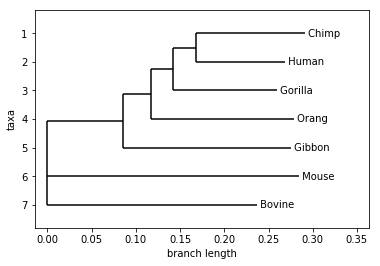

In [ ]:
############
## ANSWER ##
############

primates_aln = AlignIO.read('primates.fasta', 'fasta')

primates_dist_mtx = DistanceCalculator('identity').get_distance(primates_aln)
primates_nj_tree = DistanceTreeConstructor().nj(primates_dist_mtx)
rm_inner(primates_nj_tree)
primates_nj_tree.root_with_outgroup("Mouse","Bovine")
Phylo.draw(primates_nj_tree)

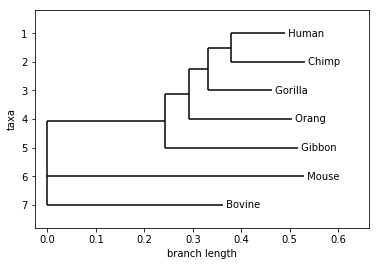

In [ ]:
primates_jc_dist_mtx = DistanceMatrix(primates_dist_mtx.names,jc_correction(primates_dist_mtx.matrix))
primates_jc_nj_tree = DistanceTreeConstructor().nj(primates_jc_dist_mtx)
rm_inner(primates_jc_nj_tree)
primates_jc_nj_tree.root_with_outgroup("Mouse","Bovine")
Phylo.draw(primates_jc_nj_tree)
